(1) Data Description:
Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.

Note that the selected dataset(s) will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. You need to summarize the full data regardless of which variables you may choose to use later on.

Players dataset (196 rows):
Experience: Describes the experience level of the player including beginner, amateur, regular, pro, and veteran. 
Subscribe: Indicates whether the player has subscribed to a game related newsletter or not.
Hashed Email: Contains a series of numbers, or an encryption, that allows you to identify the players.
Played Hours: Contains the number of hours each player has played. 
Name: Contains the name of each player so that you can identify who is playing. 
Gender: Contains the gender of each person playing.
Age: Indicates the age of each player playing.

Sessions dataset (1535 rows):
Hashed Email: Contains the same thing as in the players dataset: an encryption.
Start Time: Indicates what time each player started playing the game and the date they played it.
End Time: Indicates the time each player stopped playing the game and the date they stopped playing.
Original Start Time: Indicates the original start time of playing the game for each player. The 1st quartile is 1.716e+12, min is 1.712e+12, median is 1.719e+12, mean is 1.719e+12, 3rd quartile is 1.722e+12, and max is 1.727e+12. 
Original End Time: Indicates the original end time of playing the game for each player. The 1st quartile is 1.716e+12, min is 1.712e+12, median is 1.719e+12, mean is 1.719e+12, 3rd quartile is 1.722e+12, and max is 1.727e+12.

If this data is based on what the players choose to share (like age, gender, name), the data might not be correct. Some players might lie about their age or gender when self-reporting. People may leave the game open and come back to it (could cause issues when looking at played hours).

In [1]:
library(dplyr)
library(tidyverse)
library(repr)

data = read_csv("data/sessions.csv")

# summary(data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the co

(2) Questions:
Clearly state one broad question that you will address, and the specific question that you have formulated. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear. Describe clearly how the data will help you address the question of interest. You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.


Question 2 

What age group of players is most likely to contribute to playing time (in hours)? Age and hours played are variables given in the players dataset. I can use the group_by and summarize functions to find the time spent playing the game for each age.

(3) Exploratory Data Analysis and Visualization
In this assignment, you will:

Demonstrate that the dataset can be loaded into R.
Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.
Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
Make a few exploratory visualizations of the data to help you understand it.
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question
Note: do not perform any predictive analysis here. We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_age,mean_played_hours
<dbl>,<dbl>
20.52062,5.845918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


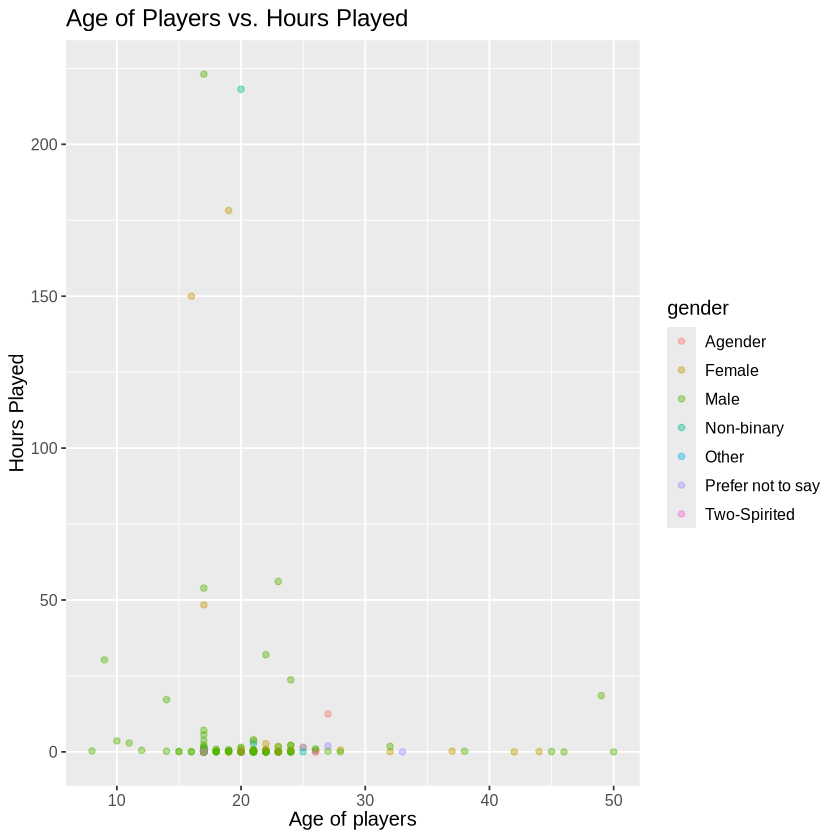

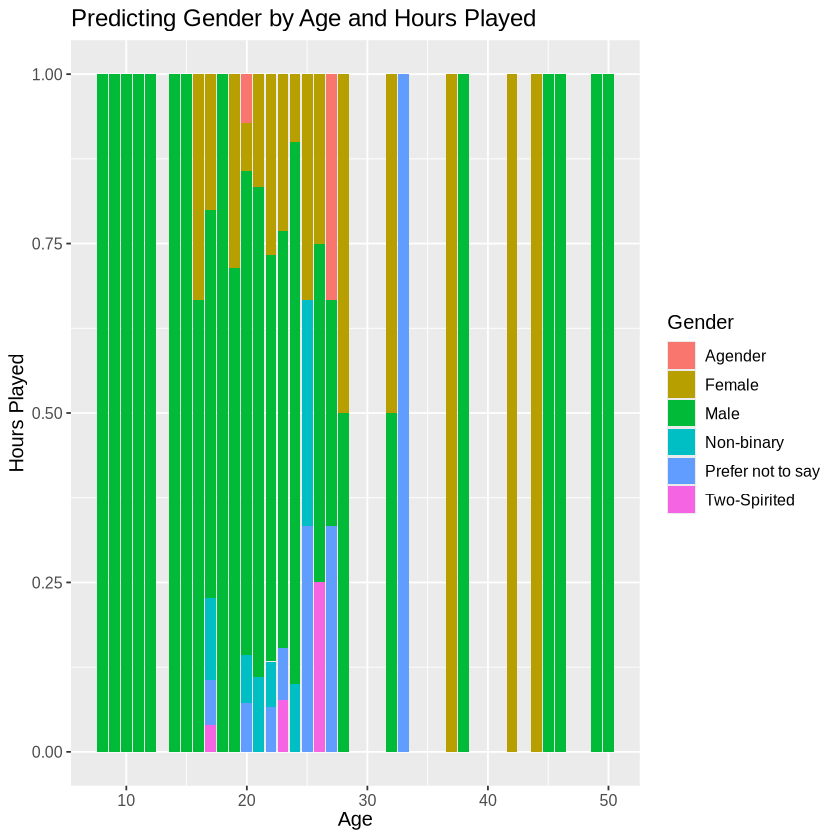

In [2]:
library(tidyverse) 
players<- read_csv("data/players.csv")

players_wrangled <- players |>
                      select(Age, gender, played_hours)


mean_values <- players_wrangled |>
                 summarize(mean_age = mean(Age, na.rm = TRUE), 
                           mean_played_hours = mean(played_hours, na.rm = TRUE))
mean_values


scatter_plot<-ggplot(players_wrangled, aes(x = Age, y = played_hours))+
        geom_point(aes(colour = gender), alpha = 0.4)+
        labs(x = "Age of players",
             y = "Hours Played",
             title = "Age of Players vs. Hours Played")+
        scale_fill_brewer(palette = "Pastel1") +
        theme(text = element_text(size = 12))
scatter_plot



bar_plot <- players_wrangled |>
   ggplot(aes(x = Age, fill = gender)) + 
   geom_bar(position = 'fill') + 
   xlab("Age") +
   ylab("Hours Played") +
   labs(fill = "Gender") +
   ggtitle("Predicting Gender by Age and Hours Played")+
   #scale_fill_brewer(palette = "Pastel1") +
   theme(text = element_text(size = 12))
bar_plot

The scatterplot is hard to read since there are outliers. Removing outliers would change the scale and be easier to read. The bar plot is hard to read because of the colours and the number of genders (not the best choice).

(4) Methods and Plan
Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

In your explanation, respond to the following questions:

Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How are you going to compare and select the model?
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
 

This method is appropriate because it helps to visualize the data and understand how different variables correlate to each other. The assumption that these variables are correlated needs to be made so that the variables chosen for the visualizations allows for a graph that is useful and easy to read. The model I will choose will be one that shows the correlation between the variables the best and is the easiest to read/make sense of the data. I will split the data into training and testing (about 70% training, 30% testing) and this is the first step done when dealing with the data. Cross validation will also be useful as it will help to reduce the standard error.